In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [3]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("bank-additional-clean-nonulls.csv", index_col = 0)
df.head()

,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1 hijos,40.005436,4.857000,4.4
85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2 hijos,57.000000,3.603174,4.8
147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,2 hijos,37.000000,4.857000,7.0
121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,3 hijos,40.000000,3.595488,2.8
63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,3 hijos,56.000000,3.602722,5.8


# Medidas de posición relativas

En este notebook, aprenderemos sobre las medidas de posición relativas. Estas medidas nos ayudan a comprender la distribución de los datos y a identificar valores atípicos.

## Percentiles

Para calcular los percentiles, usaremos el método `np.percentile()`.  La sintaxis de esta función es:

```python
np.percentile(a, q)
```

In [4]:
# Calculamos los percentiles 25 y 75 de la Columna 'age'
percentile_25_75 = np.percentile(df["age"], [25, 75])

# mostramos los resultados
print(f'El percentil 25 de la columna "age" es: {percentile_25_75[0]}')
print(f'El percentil 75 de la columna "age" es: {percentile_25_75[1]}')

# Interpretación
# El percentil 25 (primer cuartil) nos indica que el 25% de los clientes tienen una edad igual o menor que 33.
# El percentil 75 (tercer cuartil) nos indica que el 75% de clientes tienen una edad igual o menor a 46. 


El percentil 25 de la columna "age" es: 33.0
El percentil 75 de la columna "age" es: 46.0


In [5]:
df.head()

,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1 hijos,40.005436,4.857000,4.4
85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2 hijos,57.000000,3.603174,4.8
147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,2 hijos,37.000000,4.857000,7.0
121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,3 hijos,40.000000,3.595488,2.8
63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,3 hijos,56.000000,3.602722,5.8


# Ejercicios

Utilizando el DataFrame que usamos para los ejercicios de la clase invertida de ayer, contestad a las siguientes preguntas: 



1. La variable `price` representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

2. Crea una tabla de correlación que muestre cómo se relacionan las variables `price`, `retail_price`, `units_sold`, `rating_sold`, y `rating_count`. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

3. Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas `uses_ad_boosts` y `badge_product_quality`. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

4. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `badge_fast_shipping`. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

5. Calcula la media y la mediana de la variable `mean_product_prices`. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

6. Realiza un análisis de correlación entre `total_units_sold` y `mean_product_ratings_count`. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

7. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `seller_reputation`. ¿Cómo se relacionan las calificaciones de los empleados con la reputación del vendedor? Proporciona interpretaciones basadas en la tabla de contingencia.

8. Calcula la media y la mediana de la variable `discount_percentage`. ¿Qué puedes decir sobre los descuentos promedio en los productos? ¿Hay valores atípicos en esta variable?

9. Utiliza una tabla de contingencia para analizar cómo se relacionan las variables categóricas `badge_fast_shipping` y `seller_reputation`. ¿Qué puedes concluir sobre la distribución de las calificaciones altas? 



In [7]:
df = pd.read_csv('df_nulos_imputados.csv', index_col=0)
df.head(2)

,index_x,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating_x,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,index_y,merchant_id.1,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,local_product,discount_percentage,seller_reputation
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,No,3.76,54,26.0,8.0,10.0,1.0,9.0,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,822,595097d6a26f6e070cb878d1,1,100,100.0,4.129,568.0,16.00,14.00,54.0,No,-14.29,Buena
1,1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,20000,Sí,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,65,56458aa03a698c35c9050988,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,No,63.64,Regular


1. La variable `price` representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

In [9]:
print(f"La media de la variable precio es: {round(df['price'].mean(), 2)} y la mediana es: {df['price'].median()}.")
# Media: La media aritmética es el promedio de un conjunto de datos, calculado sumando todos los valores y dividiendo por el número total de datos.
# Mediana: La mediana es el valor que separa la mitad superior de la mitad inferior de un conjunto de datos ordenados.
# Es preferible usar la mediana cuando hay valores atípicos en los datos que hacen que la media no represente el valor central del conjunto de datos.

La media de la variable precio es: 8.33 y la mediana es: 8.0.


2. Crea una tabla de correlación que muestre cómo se relacionan las variables `price`, `retail_price`, `units_sold`, `rating_sold`, y `rating_count`. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.


In [12]:
from itertools import combinations

# Confirmamos el tipo de las variables
variables = ['price', 'retail_price', 'units_sold', 'rating_x', 'rating_count']
df[variables].dtypes

price           float64
retail_price      int64
units_sold        int64
rating_x        float64
rating_count      int64
dtype: object

In [13]:
# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(variables, 2))
combinaciones

[('price', 'retail_price'),
 ('price', 'units_sold'),
 ('price', 'rating_x'),
 ('price', 'rating_count'),
 ('retail_price', 'units_sold'),
 ('retail_price', 'rating_x'),
 ('retail_price', 'rating_count'),
 ('units_sold', 'rating_x'),
 ('units_sold', 'rating_count'),
 ('rating_x', 'rating_count')]

In [14]:
# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('price', 'retail_price'), ('price', 'units_sold'), ('price', 'rating_x'), ('price', 'rating_count'), ('retail_price', 'units_sold'), ('retail_price', 'rating_x'), ('retail_price', 'rating_count'), ('units_sold', 'rating_x'), ('units_sold', 'rating_count'), ('rating_x', 'rating_count')]


In [94]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df[variables].corr( method = "spearman")
df_correlaciones

,price,retail_price,units_sold,rating_x,rating_count
price,1.000000,0.536104,0.061769,0.055564,0.129345
retail_price,0.536104,1.000000,-0.027991,0.043173,0.024439
units_sold,0.061769,-0.027991,1.000000,0.026794,0.941988
rating_x,0.055564,0.043173,0.026794,1.000000,0.046749
rating_count,0.129345,0.024439,0.941988,0.046749,1.000000


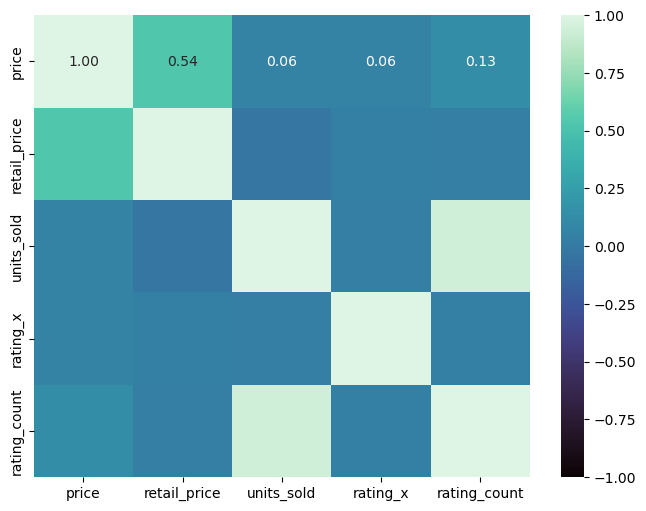

In [96]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (8, 6))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1); 

plt.show()


In [102]:
def clasificar_correlaciones(df_correlaciones):
    correlacion_debil = []
    correlacion_moderada = []
    correlacion_fuerte = []
    
    # Para evitar duplicados, utilizamos un set para registrar los pares ya procesados
    pares_procesados = set()
    
    for row in df_correlaciones.index:
        for col in df_correlaciones.columns:
            if row != col and (col, row) not in pares_procesados:
                corr_value = df_correlaciones.at[row, col]
                pares_procesados.add((row, col))
                pares_procesados.add((col, row))
                
                if 0.1 <= abs(corr_value) < 0.3:
                    correlacion_debil.append((row, col, corr_value))
                elif 0.3 <= abs(corr_value) < 0.7:
                    correlacion_moderada.append((row, col, corr_value))
                elif abs(corr_value) >= 0.7:
                    correlacion_fuerte.append((row, col, corr_value))
    
    return correlacion_debil, correlacion_moderada, correlacion_fuerte

# Interpretación 
debil, moderada, fuerte = clasificar_correlaciones(df_correlaciones)

print("Correlaciones Débiles:")
for item in debil:
    print(f"Entre {item[0]} y {item[1]}: {item[2]:.2f}")

print("\nCorrelaciones Moderadas:")
for item in moderada:
    print(f"Entre {item[0]} y {item[1]}: {item[2]:.2f}")

print("\nCorrelaciones Fuertes:")
for item in fuerte:
    print(f"Entre {item[0]} y {item[1]}: {item[2]:.2f}")


Correlaciones Débiles:
Entre price y rating_count: 0.13

Correlaciones Moderadas:
Entre price y retail_price: 0.54

Correlaciones Fuertes:
Entre units_sold y rating_count: 0.94


3. Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas `uses_ad_boosts` y `badge_product_quality`. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

In [27]:
tabla_contingencia = pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'])
tabla_contingencia

badge_product_quality,Buena,Excelente
uses_ad_boosts,,
No,826,66
Sí,630,51


### Variables:
- **badge_product_quality**: Calidad del producto (con categorías "Buena" y "Excelente").
- **uses_ad_boosts**: Uso de impulso de anuncios (con categorías "Sí" y "No").

### Interpretación de la Tabla:

| uses_ad_boosts | Buena | Excelente |
|----------------|-------|-----------|
| No             | 826   | 66        |
| Sí             | 630   | 51        |

#### Sin Impulsos de Anuncios (`No`):
- **Buena**: Hay 826 productos de calidad "Buena" que no usan impulsos de anuncios.
- **Excelente**: Hay 66 productos de calidad "Excelente" que no usan impulsos de anuncios.

#### Con Impulsos de Anuncios (`Sí`):
- **Buena**: Hay 630 productos de calidad "Buena" que usan impulsos de anuncios.
- **Excelente**: Hay 51 productos de calidad "Excelente" que usan impulsos de anuncios.

### Observaciones:
1. **Productos de Calidad "Buena"**:
   - La mayoría de los productos de calidad "Buena" no usan impulsos de anuncios (826 sin impulsos vs. 630 con impulsos).

2. **Productos de Calidad "Excelente"**:
   - También, la mayoría de los productos de calidad "Excelente" no usan impulsos de anuncios (66 sin impulsos vs. 51 con impulsos).

3. **Relación entre Calidad y Uso de Impulsos**:
   - En ambas categorías de calidad ("Buena" y "Excelente"), hay más productos que no usan impulsos de anuncios en comparación con aquellos que sí los usan.
   - La diferencia entre las dos categorías de calidad no es muy pronunciada, aunque hay un poco más de productos de calidad "Buena" en ambas situaciones (con y sin impulsos).

### Posibles Conclusiones:
- La mayoría de los productos en este conjunto de datos no usan impulsos de anuncios, independientemente de su calidad.
- Hay una mayor cantidad de productos de calidad "Buena" tanto en los que usan como en los que no usan impulsos de anuncios.

4. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `badge_fast_shipping`. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

In [66]:
# Para identificar la tendencia, calcularemos el porcentaje de productos locales y no locales que tienen envío rápido.
tabla_contingencia = pd.crosstab(df['badge_local_product'], df['badge_fast_shipping'], normalize='index')*100
tabla_contingencia.round(2)

badge_fast_shipping,No,Sí
badge_local_product,,
No,99.29,0.71
Sí,68.97,31.03



### Interpretación de Resultados

1. **Productos no locales**:
   - Solo el 0.71% de los productos no locales tienen envío rápido.

2. **Productos locales**:
   - El 31.03% de los productos locales tienen envío rápido.

### Conclusión

Hay una tendencia clara en la que los productos locales están más asociados con envíos rápidos en comparación con los productos no locales. 

5. Calcula la media y la mediana de la variable `mean_product_prices`. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

In [29]:
print(df['mean_product_prices'].mean())
print(df['mean_product_prices'].median())

8.325600762873488
8.0


### Comparación de la Media y la Mediana

- **Media de `mean_product_prices`**: 8.3256
- **Mediana de `mean_product_prices`**: 8.0

### Interpretación

1. **Proximidad de Media y Mediana**:
   - La media (8.3256) y la mediana (8.0) de `mean_product_prices` están bastante cercanas entre sí.
   - Esta proximidad sugiere que los datos no tienen una gran asimetría.

2. **Distribución de los Precios Promedio de los Productos**:
   - **Simetría**: Cuando la media y la mediana están cerca, generalmente indica que la distribución es bastante simétrica.
   - **Ausencia de Sesgo Extremo**: No hay un sesgo significativo hacia la derecha o la izquierda. Si la media fuera mucho mayor que la mediana, indicaría una distribución sesgada a la derecha (positiva), y si fuera mucho menor, una distribución sesgada a la izquierda (negativa).
   - **Presencia de Outliers**: La diferencia pequeña entre la media y la mediana sugiere que no hay outliers extremos que estén afectando drásticamente la media.

### Posibles Conclusiones

- **Distribución Aproximadamente Simétrica**: Los precios promedio de los productos parecen estar distribuidos de manera bastante uniforme, sin una asimetría marcada.
- **Robustez de Medidas**: Tanto la media como la mediana son representativas del centro de la distribución, indicando que ambas son medidas robustas en este contexto.

En resumen, la cercanía entre la media y la mediana de los precios promedio de los productos sugiere una distribución simétrica y sin sesgos significativos, indicando una distribución bastante equilibrada de los precios.

### Notas de Recomendaciones para Análisis Adicional

1. **Gráficos**:
   - **Histograma**: Para visualizar la distribución completa de los precios.
   - **Gráfico de Caja (Box Plot)**: Para identificar posibles outliers y ver la dispersión de los datos.

2. **Estadísticas Descriptivas Adicionales**:
   - **Desviación Estándar**: Para entender la dispersión de los datos alrededor de la media.
   - **Percentiles**: Para observar la distribución de los datos en diferentes puntos (por ejemplo, 25%, 50%, 75%).

3. **Pruebas de Normalidad**:
   - **Test de Shapiro-Wilk** o **Kolmogorov-Smirnov**: Para verificar si los datos siguen una distribución normal.

4. **Comparación con otras Variables**:
   - Si hay otras variables relevantes (por ejemplo, categorías de productos), podría ser útil comparar los precios promedio entre estas categorías para identificar patrones específicos.

6. Realiza un análisis de correlación entre `total_units_sold` y `mean_product_ratings_count`. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

In [50]:
lineal, no_lineal = identificar_linealidad(df, [('total_units_sold', 'mean_product_ratings_count')])
no_lineal

[('total_units_sold', 'mean_product_ratings_count')]

In [52]:
df_correlaciones = df[['total_units_sold', 'mean_product_ratings_count']].corr( method = "spearman")
df_correlaciones

,total_units_sold,mean_product_ratings_count
total_units_sold,1.000000,0.875353
mean_product_ratings_count,0.875353,1.000000


In [54]:
# Interpretación 
debil, moderada, fuerte = clasificar_correlaciones(df_correlaciones)

print("\nCorrelaciones Fuertes:")
for item in fuerte:
    print(f"Entre {item[0]} y {item[1]}: {item[2]:.2f}")



Correlaciones Fuertes:
Entre total_units_sold y mean_product_ratings_count: 0.88


7. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `seller_reputation`. ¿Cómo se relacionan las calificaciones de los empleados con la reputación del vendedor? Proporciona interpretaciones basadas en la tabla de contingencia.

In [63]:
tabla_contingencia = pd.crosstab(df['badge_local_product'], df['seller_reputation'], normalize='index') # La opción normalize='index' calcula los porcentajes por fila (dentro de cada valor de badge_local_product). Si prefieres calcular los porcentajes por columna, puedes usar normalize='columns'
(tabla_contingencia*100).round(2)

seller_reputation,Buena,Regular
badge_local_product,,
No,58.55,41.45
Sí,93.10,6.90


### Interpretación de Resultados

1. **Productos no locales**:
   - El 58.54% de los productos no locales tienen una reputación buena.
   - El 41.46% de los productos no locales tienen una reputación regular.

2. **Productos locales**:
   - El 93.10% de los productos locales tienen una reputación buena.
   - El 6.90% de los productos locales tienen una reputación regular.

### Conclusión

- **Productos Locales**: Hay una fuerte tendencia de que los productos locales (sí) estén asociados con una buena reputación del vendedor. El porcentaje de productos locales con buena reputación (93.10%) es significativamente mayor que el de los productos no locales (58.54%).
- **Productos No Locales**: Aunque los productos no locales también tienen una mayoría con buena reputación, esta es menor comparada con los productos locales.

8. Calcula la media y la mediana de la variable `discount_percentage`. ¿Qué puedes decir sobre los descuentos promedio en los productos? ¿Hay valores atípicos en esta variable?

In [67]:
print(df['discount_percentage'].mean())
print(df['discount_percentage'].median())
# La gran diferencia entre la média y la mediana sugiere que hay outliers.

26.060667514303876
5.83


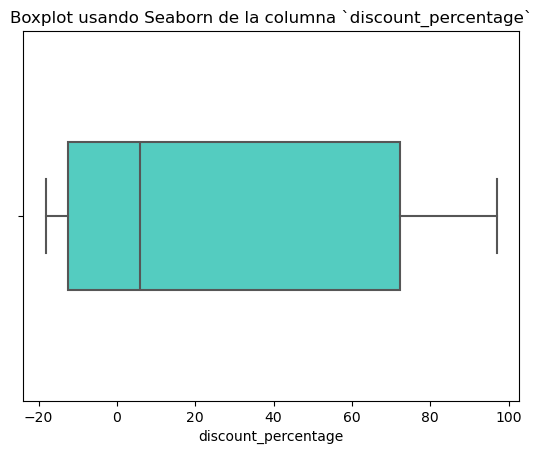

In [71]:
# Para comprobarlo, haremos un boxplot
# añadimos un boxplot creado con Seaborn usando el método 'sns.boxplot()'
sns.boxplot(x = "discount_percentage", 
            data = df, 
            width = 0.4, 
            color = "turquoise")

# añadimos un título a esta primera gráfica usando el método '.set_title()
plt.title("Boxplot usando Seaborn de la columna `discount_percentage`");

In [72]:
print(df['discount_percentage'].min())
print(df['discount_percentage'].max())

-18.2
96.93


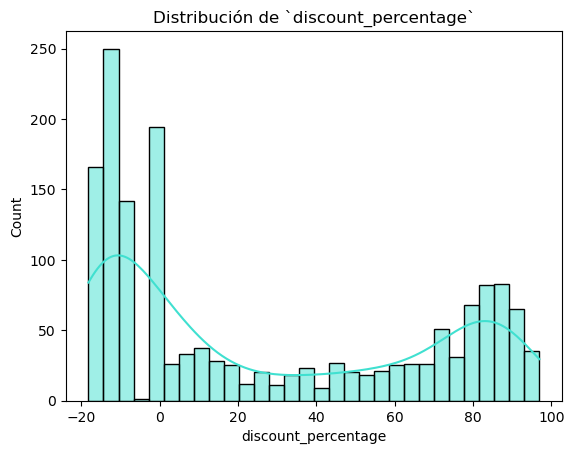

In [73]:
sns.histplot(df['discount_percentage'], bins=30, kde=True, color="turquoise")
plt.title("Distribución de `discount_percentage`")
plt.show()


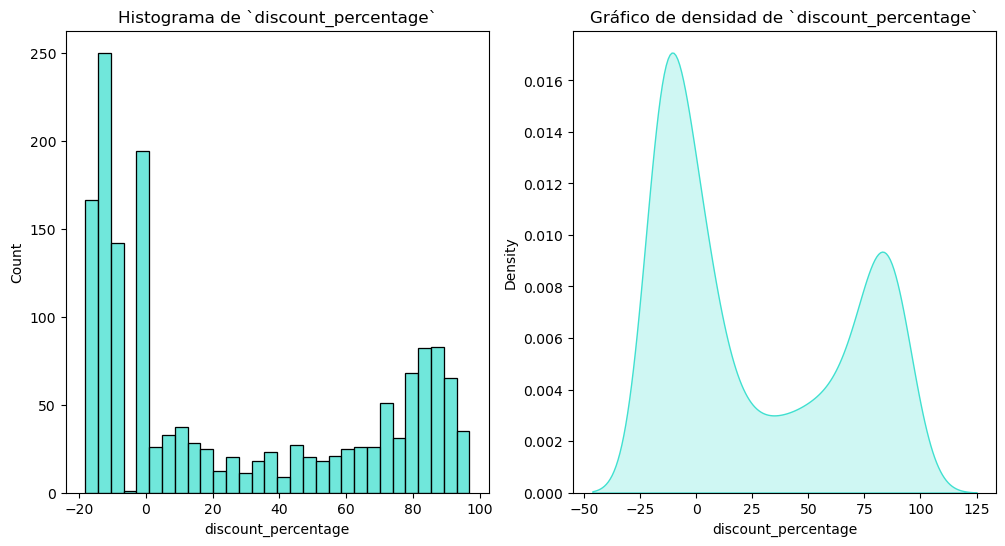

In [74]:
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['discount_percentage'], bins=30, kde=False, color="turquoise")
plt.title("Histograma de `discount_percentage`")

# Gráfico de densidad
plt.subplot(1, 2, 2)
sns.kdeplot(df['discount_percentage'], shade=True, color="turquoise")
plt.title("Gráfico de densidad de `discount_percentage`")

plt.show()


In [ ]:
# Distribución Bimodal o distribución multimodal, mas de una es multimodal, si son dos es bimodal.

9. Utiliza una tabla de contingencia para analizar cómo se relacionan las variables categóricas `badge_fast_shipping` y `seller_reputation`. ¿Qué puedes concluir sobre la distribución de las calificaciones altas? 

In [79]:
tabla_contingencia = pd.crosstab(df['badge_fast_shipping'], df['seller_reputation'], normalize='index') # La opción normalize='index' calcula los porcentajes por fila (dentro de cada valor de badge_local_product). Si prefieres calcular los porcentajes por columna, puedes usar normalize='columns'
(tabla_contingencia*100).round(2)

seller_reputation,Buena,Regular
badge_fast_shipping,,
No,58.92,41.08
Sí,80.00,20.00


### Interpretación de la Tabla de Contingencia

1. Cuando el `badge_fast_shipping` es "No", el 58.92% de los vendedores tienen una reputación "Buena" y el 41.08% tienen una reputación "Regular".

2. Cuando el `badge_fast_shipping` es "Sí", el 80.00% de los vendedores tienen una reputación "Buena" y el 20.00% tienen una reputación "Regular".

### Conclusiones

- **Distribución de las Calificaciones Altas**: Los vendedores que ofrecen envíos rápidos (`badge_fast_shipping` es "Sí") tienden a tener una reputación significativamente mejor. Específicamente, el 80.00% de estos vendedores tienen una reputación "Buena", en comparación con el 58.92% de los vendedores que no ofrecen envíos rápidos.
  
- **Relación Positiva entre Envío Rápido y Buena Reputación**: Los datos sugieren que hay una relación positiva entre ofrecer envíos rápidos y tener una reputación "Buena". Los vendedores con el `badge_fast_shipping` "Sí" tienen una mayor proporción de buena reputación en comparación con los que no tienen este badge.

# Cálculo del rango interquartilico

In [97]:
# Para la variable price
q1 = np.nanpercentile(df['price'], 25)
q3 = np.nanpercentile(df['price'], 75)

In [99]:
iqr = q3 - q1
iqr

5.1899999999999995

In [100]:
step = iqr * 1.5
right_whisk = q3 + step
right_whisk

18.785

In [101]:
left_whisk = q1 - step
left_whisk

-1.9749999999999988